In [10]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

108385


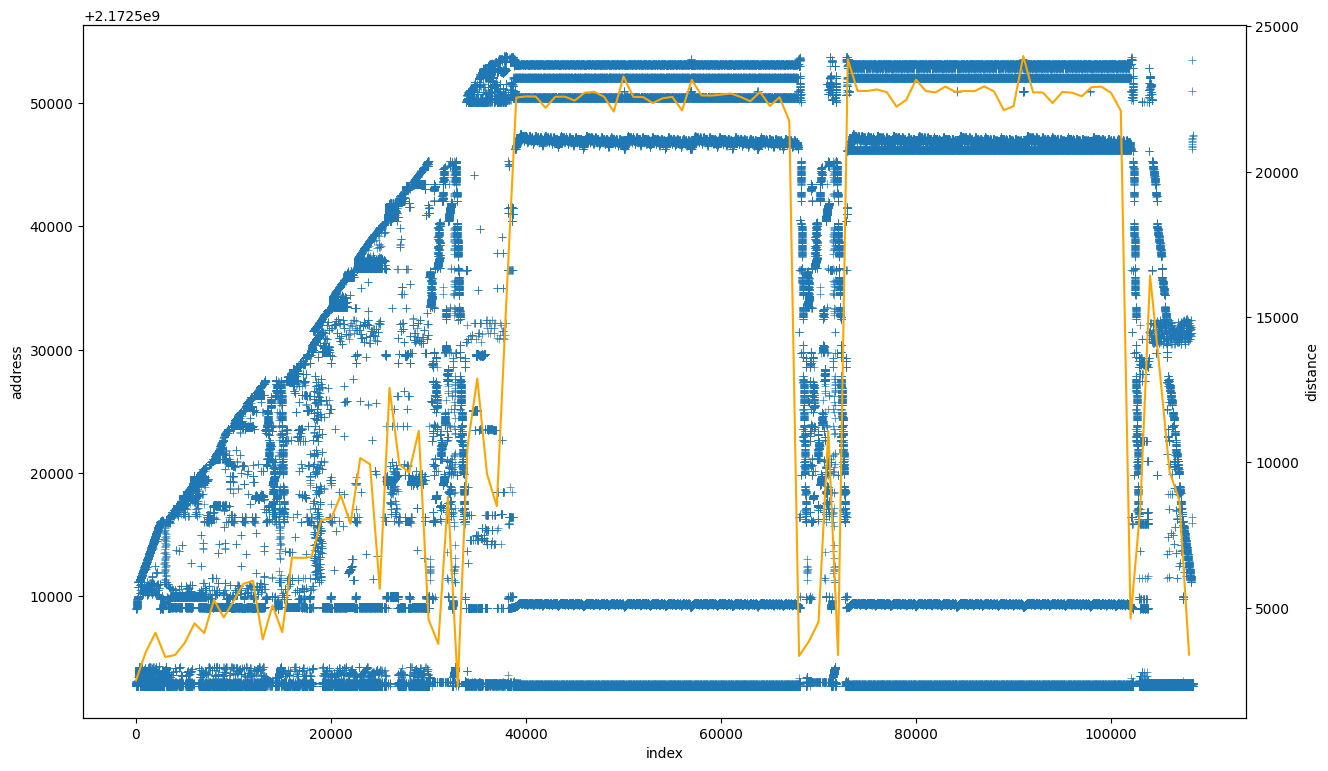

In [97]:
df = pd.read_csv('../access.csv', names=['index', 'address'])
df = df.set_index('index')

# df['address'] = df[df['address'] < 0.6e14]

print(len(df['address']))

average_spans = {'index': [], 'distance': []}
k = 1000 # number of accesses to measure span over

for i in range(0, len(df['address']), k):
    dist = 0
    average_spans['index'].append(i)
    last = df['address'][i]
    for a in df['address'][i+1:i+k]:
        dist += abs(last - a)
        last = a
    dist /= k
    average_spans['distance'].append(dist)

# temporal_affinity = []
# spacial_affinty = []
# for a in df['|address']:
#     print(a)

# df['address'] /= 4096

access_spans = []

fig, ax = plt.subplots(figsize=(15, 9))
ax2 = ax.twinx()

sns.scatterplot(data=df, x='index', y='address', marker='+', ax=ax)
sns.lineplot(data=pd.DataFrame(average_spans), x='index', y='distance', ax=ax2, color='orange')

plt.show()

# df['access_span'] = access_spans

